In [7]:
import numpy as np

def cart2sph(x,y,z,vx,vy,vz):
	r = np.sqrt(x**2+y**2+z**2)
	theta = np.arccos(z/r)
	phi = np.sign(y)*np.arccos(x/np.sqrt(x**2+y**2))
	vr = (x*vx + y*vy + z*vz)/r
	vtheta = np.sum(np.array([vx,vy,vz])*np.array([np.cos(theta)*np.cos(phi),np.cos(theta)*np.sin(phi),-np.sin(theta)]))/r # come back and make these trigonometric functions into functions of x, y, z
	vphi = np.sum(np.array([vx,vy,vz])*np.array([-np.sin(phi),np.cos(phi),0]))/np.sqrt(x**2 + y**2)
	return r,theta,phi,vr,vtheta,vphi

def sph2cart(r,theta,phi,vr,vtheta,vphi=0):
	x = r*np.sin(theta)*np.cos(phi)
	y = r*np.sin(theta)*np.sin(phi)
	z = r*np.cos(theta)
	rho = r*np.sin(theta)
	vx = vr*np.sin(theta)*np.cos(phi) + r*vtheta*np.cos(theta)*np.cos(phi) - rho*vphi*np.sin(phi)
	vy = vr*np.sin(theta)*np.sin(phi) + r*vtheta*np.cos(theta)*np.sin(phi) + rho*vphi*np.cos(phi)
	vz = vr*np.cos(theta) - np.sin(theta)
	return x,y,z,vx,vy,vz

TypeError: sph2cart() missing 4 required positional arguments: 'theta', 'phi', 'vr', and 'vtheta'

In [6]:
cart2sph(1,0,0,0,0,-1)

(1.0, 1.5707963267948966, 0.0, 0.0, 1.0, 0.0)

In [7]:
sph2cart(1.0, 1.5707963267948966, 0.0, 0.0, 1.0, 0.0)

(1.0, 0.0, 6.123233995736766e-17, 6.123233995736766e-17, 0.0, -1.0)

In [8]:
cart2sph(np.cos(np.pi/4),0,np.sin(np.pi/4),np.cos(np.pi/4),0,-np.sin(np.pi/4))

(1.0, 0.7853981633974483, 0.0, 0.0, 1.0000000000000002, 0.0)

In [9]:
sph2cart(1.0, 0.7853981633974483, 0.0, 0.0, 1.0000000000000002, 0.0)

(0.7071067811865476,
 0.0,
 0.7071067811865476,
 0.7071067811865477,
 0.0,
 -0.7071067811865476)

In [27]:
def cart2sph(x,y,z,vx,vy,vz):
	r = np.sqrt(x**2+y**2+z**2)
	theta = np.arccos(z/r)
	phi = np.sign(y)*np.arccos(x/np.sqrt(x**2+y**2))
	rho = np.sqrt(x**2+y**2)
	sinTheta = rho/r
	cosTheta = z/r
	sinPhi = y/rho
	cosPhi = x/rho
	vr = (x*vx + y*vy + z*vz)/r
	vtheta = np.sum(np.array([vx,vy,vz])*np.array([cosTheta*cosPhi,cosTheta*sinPhi,-sinTheta]))/r # come back and make these trigonometric functions into functions of x, y, z
    vtheta = (vx*cosTheta*cosPhi + vy*cosTheta*sinPhi - vz*sinTheta)/r
	vphi = np.sum(np.array([vx,vy,vz])*np.array([-sinPhi,cosPhi,0]))/rho
    vphi = (-vx*sinPhi + vy*cosPhi)/rho
	return r,theta,phi,vr,vtheta,vphi

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 12)

In [16]:
cart2sph(1,0,0,0,0,-1)

(1.0, 1.5707963267948966, 0.0, 0.0, 1.0, 0.0)

In [17]:
cart2sph(np.cos(np.pi/4),0,np.sin(np.pi/4),np.cos(np.pi/4),0,-np.sin(np.pi/4))

(1.0, 0.7853981633974483, 0.0, 0.0, 1.0000000000000002, 0.0)

In [34]:
def cart2sph(x,y,z,vx,vy,vz):
	r = np.sqrt(x**2+y**2+z**2)
	theta = np.arccos(z/r)
	phi = np.sign(y)*np.arccos(x/np.sqrt(x**2+y**2))
	rho = np.sqrt(x**2+y**2)
	sinTheta = rho/r
	cosTheta = z/r
	sinPhi = y/rho
	cosPhi = x/rho
	vr = (x*vx + y*vy + z*vz)/r
	vtheta = (vx*cosTheta*cosPhi + vy*cosTheta*sinPhi - vz*sinTheta)/r
	vphi = (-vx*sinPhi + vy*cosPhi)/rho
	return r,theta,phi,vr,vtheta,vphi

In [35]:
cart2sph(1,0,0,0,0,-1)

(1.0, 1.5707963267948966, 0.0, 0.0, 1.0, 0.0)

In [36]:
cart2sph(np.cos(np.pi/4),0,np.sin(np.pi/4),np.cos(np.pi/4),0,-np.sin(np.pi/4))

(1.0, 0.7853981633974483, 0.0, 0.0, 1.0000000000000002, 0.0)

In [5]:
# takes in the initial image and prepares it for the lensing simulation.
# saves an array of the RGB values to a file

import numpy as np
import PIL
from PIL import Image as Im

# method to be used by other files in case we don't want to run this individually
def imageTakeInner(image_file):
    image = Im.open(image_file)
    image = np.array(image)
    return image

# method to find where the ray passes through an image
def findPixel(y_center, x_center, z_position, pixel_length, ri, v):
    xi, yi, zi = ri # initial positions, should input the final positions BEFORE the ray passes through the image
    vx, vy, vz = v # velocities from the same time as the initial position
    Z = z_position - zi
    xf = xi + Z*(vx/vz)
    yf = yi + Z*(vy/vz)
    j = (xf + x_center)/pixel_length
    i = (yf + y_center)/pixel_length
    j, i = round(j), round(i)
    return i, j # y then x indices for the pixel

# choose the image to use and the file to save to HERE
image_file = 'stock-photo-young-attractive-dangerous-woman-aiming-at-gold-fish-55445056.jpg' # input file
array_file = 'usable.npy' # 0utput file with the format .npy

image = Im.open(image_file)
image = np.array(image)
np.save(array_file, image)

In [6]:
findPixel(0,0,10,1,np.array([0,0,0]),np.array([1,-1,2]))

(-5, 5)

In [7]:
findPixel(3,8,10,1,np.array([0,0,0]),np.array([1,-1,2]))

(-2, 13)

In [8]:
findPixel(3,8.1,10,1,np.array([0,0,0]),np.array([1,-1,2]))

(-2, 13)

In [10]:
cart2sph(0,1,0,0,0,-1)

(1.0, 1.5707963267948966, 1.5707963267948966, 0.0, 1.0, 0.0)

In [11]:
# Equations of motion for the Schwarchild Metric
def F_schwarz(t, u, E, L): # Note, this takes in SPHERICAL COORDINATES and outputs them in SPHERICAL COORDINATES
	r, theta, phi, vr, vtheta, vphi = u
	# vel = np.array([vx, vy, vz])
	vphi = L/(r**2)
	ar = -Rs/(2*r**2)*((L/r)**2)+((L**2)/(r**3))*(1-(Rs/r))
	atheta = 0
	aphi = 0

	return np.array([vr, vtheta, vphi, ar, atheta, aphi])

In [12]:
# Richardson Extrapolation using RK4 with a full time step and two half time steps.
# [This one works!]
def rk4RE(u, f, t, h, E, L):
	p = 4
	eps_rel = 1e-8
	eps_abs = 1e-15
	# u1 using usual RK4 with two half-time steps

	u1 = rk4(u, f, t, h/2, E, L)
	u1 = rk4(u1, f, t+h/2, h/2, E, L)

	# u2 with one timestep
	u2 = rk4(u, f, t, h, E, L)

	lte = 2**p/(2**p-1)*np.abs(u1-u2) # Local truncation error (local error estimate)
	re = lte/(eps_rel*abs(u) + eps_abs)
	re = np.max(np.where(re==0, 1, re)) # Replace zeros with ones to avoid division by zero
	hnew = h/re**(1/(p+1)) # time step adjustment

	if np.max(re)>2:
		return rk4RE(u, f, t, hnew, E, L)
	else:
		return hnew, rk4(u, f, t, hnew, E, L)

In [10]:
def cart2sph(x,y,z,vx,vy,vz):
	r = np.sqrt(x**2+y**2+z**2)
	theta = np.arccos(z/r)
	phi = np.sign(y)*np.arccos(x/np.sqrt(x**2+y**2))
	rho = np.sqrt(x**2+y**2)
	sinTheta = rho/r
	cosTheta = z/r
	sinPhi = y/rho
	cosPhi = x/rho
	vr = (x*vx + y*vy + z*vz)/r
	vtheta = (vx*cosTheta*cosPhi + vy*cosTheta*sinPhi - vz*sinTheta)/r
	vphi = (-vx*sinPhi + vy*cosPhi)/rho
	return r,theta,phi,vr,vtheta,vphi

def sph2cart(r,theta,phi,vr,vtheta,vphi=0):
	x = r*np.sin(theta)*np.cos(phi)
	y = r*np.sin(theta)*np.sin(phi)
	z = r*np.cos(theta)
	rho = r*np.sin(theta)
	vx = vr*np.sin(theta)*np.cos(phi) + r*vtheta*np.cos(theta)*np.cos(phi) - rho*vphi*np.sin(phi)
	vy = vr*np.sin(theta)*np.sin(phi) + r*vtheta*np.cos(theta)*np.sin(phi) + rho*vphi*np.cos(phi)
	vz = vr*np.cos(theta) - r*vtheta*np.sin(theta)
	return x,y,z,vx,vy,vz

In [33]:
M = 3
Rs = 2*M # Schwarzschild Radius
def integrate_EOM(r0=np.array([0, 3*M, 0], dtype = np.float64), v0=np.array([1, 0, 0], dtype = np.float64), h=0.5): # Takes in CARTESIAN positions and velocities
	t = 0
	u = np.array(cart2sph(r0[0], r0[1], r0[2], v0[0], v0[1], v0[2]))
	print(u)
	uList = [[t, u[0], u[1], u[2], u[3], u[4], u[5]]]
	counter = 0
	MaxCount = 10000
	sphICs = cart2sph(r0[0],r0[1],r0[2],v0[0],v0[1],v0[2]) # For FIXED ICs, [r, theta, phi, vr, vtheta, vphi]
	L = (sphICs[0]**2)*(sphICs[5]**2)
	E = np.sqrt(sphICs[3]**2 + A(sphICs[0])*((L/sphICs[0])**2))
	while (t < 500) and (u[0] > Rs) and counter < MaxCount:
		counter += 1
		h, u[:] = rk4RE(u, F_schwarz, t, h, E, L)
		t += h
		uList.append([t, u[0], u[1], u[2], u[3], u[4], u[5]])
	uArr = np.transpose(np.array([uList])) # transposed to make positions easier to grab.
	return uArr # [t, r, theta, phi, vr, vtheta, vphi]

In [17]:
def A(r):
	return 1-(2*M/r)

In [21]:
# RK4
def rk4(u, f, t, h, E, L):
	k1 = f(t, u, E, L)
	k2 = f(t + 0.5*h, u + 0.5*h*k1, E, L)
	k3 = f(t + 0.5*h, u + 0.5*h*k2, E, L)
	k4 = f(t + h, u + h*k3, E, L)
	return u + h/6 * (k1 + 2*k2 + 2*k3 + k4)

In [53]:
U = integrate_EOM(np.array([0,3*M,0]),np.array([0,0,-1]))

[9.         1.57079633 1.57079633 0.         0.11111111 0.        ]


In [65]:
import numpy as np

In [75]:
u = sph2cart(U[1],U[2],U[3],U[4],U[5],U[6])

In [76]:
np.shape(u)

(6, 1001, 1)

In [55]:
import matplotlib.pyplot as plt

(-9.897029519162198, 9.899858548531533, -9.898880737339436, 9.899490868695896)

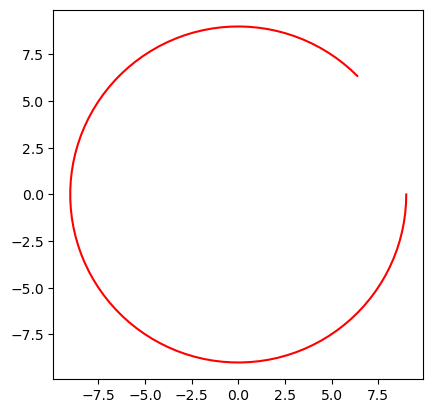

In [88]:
#plt.plot(u[1][:100],u[2][:100])
plt.plot(u[1][:100],u[2][:100],color='r')
plt.axis('scaled')

In [4]:
import numpy as np
sph2cart(cart2sph(-20,20,0,1,0,0))

TypeError: sph2cart() missing 4 required positional arguments: 'theta', 'phi', 'vr', and 'vtheta'

In [11]:
cart2sph(-20,20,0,1,0,0)

(28.284271247461902,
 1.5707963267948966,
 2.356194490192345,
 -0.7071067811865475,
 0.0,
 -0.024999999999999998)

In [12]:
sph2cart(28.284271247461902,
 1.5707963267948966,
 2.356194490192345,
 -0.7071067811865475,
 -1.5308084989341912e-18,
 -0.025)

(-20.0, 20.000000000000004, 1.7319121124709867e-15, 1.0, 0.0, 0.0)